# Traffic Analysis

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import datetime
import sys
from typing import Iterable

sys.path.append("../../..")

In [2]:
import matplotlib
from matplotlib import pyplot
import pandas as pd

#matplotlib.rcParams['figure.figsize'] = (9.5, 10.0)

In [3]:
import netanalysis.traffic.data.model as traffic
from netanalysis.traffic.data.file_repository import FileTrafficRepository
import netanalysis.traffic.analysis.find_anomalies as fa
from netanalysis.infrastructure.resources import resource_filename

PRODUCT_LIST = [
    traffic.ProductId.WEB_SEARCH, traffic.ProductId.MAPS, traffic.ProductId.IMAGES,
    traffic.ProductId.YOUTUBE, traffic.ProductId.BLOGGER, traffic.ProductId.SITES,
    traffic.ProductId.GMAIL, traffic.ProductId.GROUPS,
    traffic.ProductId.TRANSLATE,
    traffic.ProductId.SPREADSHEETS, traffic.ProductId.DOCS,
    traffic.ProductId.EARTH
]
repo = FileTrafficRepository(resource_filename("traffic_data"))

In [4]:
def plot_expectations(time_series, expectations):
    time_series.plot()
    expectations.expected.plot(linewidth=1)
    pyplot.fill_between(time_series.index, expectations.lower_bound, expectations.upper_bound, alpha=0.3, linewidth=0)
    anomalous_dates = (time_series < expectations.lower_bound).loc[lambda e: e].index
    if not anomalous_dates.empty:
        time_series[anomalous_dates].plot(style='ro')

In [5]:
def show_region_traffic(region_code, product_ids) -> None:
    fig = pyplot.figure()
    for index, product_id in enumerate(product_ids):
        hires_traffic = repo.get_traffic(region_code, product_id)
        if hires_traffic.empty:
            continue    
        time_series = hires_traffic.resample("D").mean()
        expectations = fa.get_expectations_1(time_series)
        axes = fig.add_subplot(len(product_ids), 1, index + 1)
        axes.set_ylabel(product_id.name)
        axes.set_ylim(bottom=0, top=time_series.max()*1.1)
        plot_expectations(time_series["2016":], expectations["2016":])
        fig.show()

def show_product_traffic(product_id: traffic.ProductId, regions: Iterable[str]) -> None:
    fig = pyplot.figure()
    for index, region_code in enumerate(regions):
        hires_traffic = repo.get_traffic(region_code, product_id)
        if hires_traffic.empty:
            continue    
        time_series = hires_traffic.resample("D").mean()
        expectations = fa.get_expectations_1(time_series)
        axes = fig.add_subplot(len(regions), 1, index + 1)
        axes.set_ylabel(region_code)
        axes.set_ylim(bottom=0, top=time_series.max()*1.1)
        plot_expectations(time_series["2016":], expectations["2016":])
        fig.show()

## Analysis

In [6]:
INTERESTING_REGIONS = [
    "DZ", "BY", "CM", "CD", "EG", "ET", "GA", "GM", "IN", "IR", "IQ", "PK", "SA", "SY", "TG", "TR", "UA", "VN",
    "PR", "VI", "TC", "US"
]

<IPython.core.display.Javascript object>


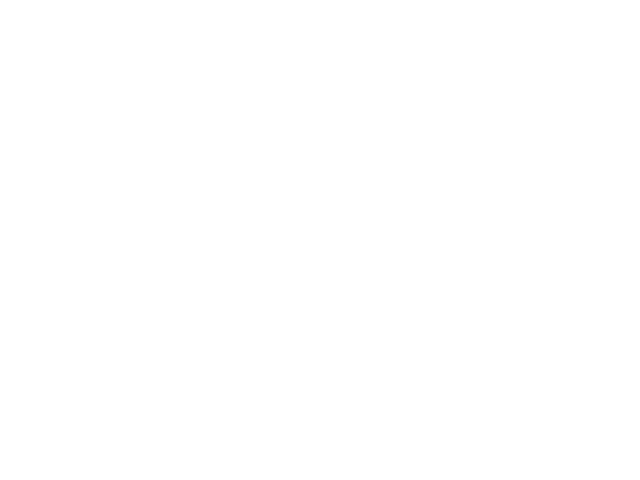

In [7]:
# The US is a control
show_region_traffic("US", PRODUCT_LIST)

In [8]:
all_disruptions = fa.find_all_disruptions(repo, INTERESTING_REGIONS, PRODUCT_LIST)
all_disruptions.sort(reverse=True, key=lambda d: (d.start, d.end))

INFO:root:Processing region DZ product WEB_SEARCH
INFO:root:Found 0 major product disruptions from 4 disruptions and 6 anomalies
INFO:root:Processing region DZ product MAPS
INFO:root:Empty time series for region DZ product MAPS
INFO:root:Processing region DZ product IMAGES
INFO:root:Empty time series for region DZ product IMAGES
INFO:root:Processing region DZ product YOUTUBE
INFO:root:Found 0 major product disruptions from 6 disruptions and 11 anomalies
INFO:root:Processing region DZ product BLOGGER
INFO:root:Found no anomalies
INFO:root:Processing region DZ product SITES
INFO:root:Found 0 major product disruptions from 1 disruptions and 1 anomalies
INFO:root:Processing region DZ product GMAIL
INFO:root:Empty time series for region DZ product GMAIL
INFO:root:Processing region DZ product GROUPS
INFO:root:Found 1 major product disruptions from 1 disruptions and 1 anomalies
INFO:root:Processing region DZ product TRANSLATE
INFO:root:Found 1 major product disruptions from 6 disruptions and 

INFO:root:Empty time series for region ET product EARTH
INFO:root:Found 5 region disruptions from 14 product disruptions for ET
INFO:root:Processing region GA product WEB_SEARCH
INFO:root:Found 4 major product disruptions from 9 disruptions and 27 anomalies
INFO:root:Processing region GA product MAPS
INFO:root:Empty time series for region GA product MAPS
INFO:root:Processing region GA product IMAGES
INFO:root:Empty time series for region GA product IMAGES
INFO:root:Processing region GA product YOUTUBE
INFO:root:Found 5 major product disruptions from 6 disruptions and 34 anomalies
INFO:root:Processing region GA product BLOGGER
INFO:root:Found 2 major product disruptions from 4 disruptions and 9 anomalies
INFO:root:Processing region GA product SITES
INFO:root:Found no anomalies
INFO:root:Processing region GA product GMAIL
INFO:root:Empty time series for region GA product GMAIL
INFO:root:Processing region GA product GROUPS
INFO:root:Empty time series for region GA product GROUPS
INFO:root

INFO:root:Processing region PK product SPREADSHEETS
INFO:root:Empty time series for region PK product SPREADSHEETS
INFO:root:Processing region PK product DOCS
INFO:root:Empty time series for region PK product DOCS
INFO:root:Processing region PK product EARTH
INFO:root:Empty time series for region PK product EARTH
INFO:root:Found 2 region disruptions from 2 product disruptions for PK
INFO:root:Processing region SA product WEB_SEARCH
INFO:root:Found 0 major product disruptions from 9 disruptions and 13 anomalies
INFO:root:Processing region SA product MAPS
INFO:root:Empty time series for region SA product MAPS
INFO:root:Processing region SA product IMAGES
INFO:root:Empty time series for region SA product IMAGES
INFO:root:Processing region SA product YOUTUBE
INFO:root:Found 0 major product disruptions from 5 disruptions and 25 anomalies
INFO:root:Processing region SA product BLOGGER
INFO:root:Found 1 major product disruptions from 1 disruptions and 2 anomalies
INFO:root:Processing region S

INFO:root:Found 1 major product disruptions from 6 disruptions and 28 anomalies
INFO:root:Processing region VN product SPREADSHEETS
INFO:root:Empty time series for region VN product SPREADSHEETS
INFO:root:Processing region VN product DOCS
INFO:root:Empty time series for region VN product DOCS
INFO:root:Processing region VN product EARTH
INFO:root:Empty time series for region VN product EARTH
INFO:root:Found 1 region disruptions from 2 product disruptions for VN
INFO:root:Processing region PR product WEB_SEARCH
INFO:root:Found 2 major product disruptions from 3 disruptions and 31 anomalies
INFO:root:Processing region PR product MAPS
INFO:root:Empty time series for region PR product MAPS
INFO:root:Processing region PR product IMAGES
INFO:root:Empty time series for region PR product IMAGES
INFO:root:Processing region PR product YOUTUBE
INFO:root:Found 2 major product disruptions from 3 disruptions and 31 anomalies
INFO:root:Processing region PR product BLOGGER
INFO:root:Found 2 major prod

## Internet Shutdowns

Found 26 shutdowns


<IPython.core.display.Javascript object>


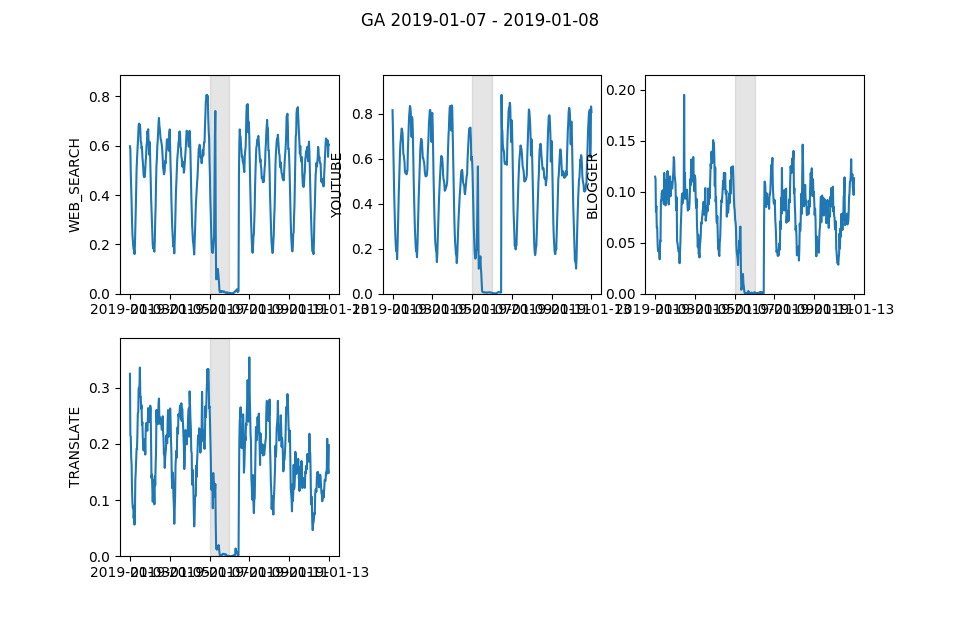

<IPython.core.display.Javascript object>


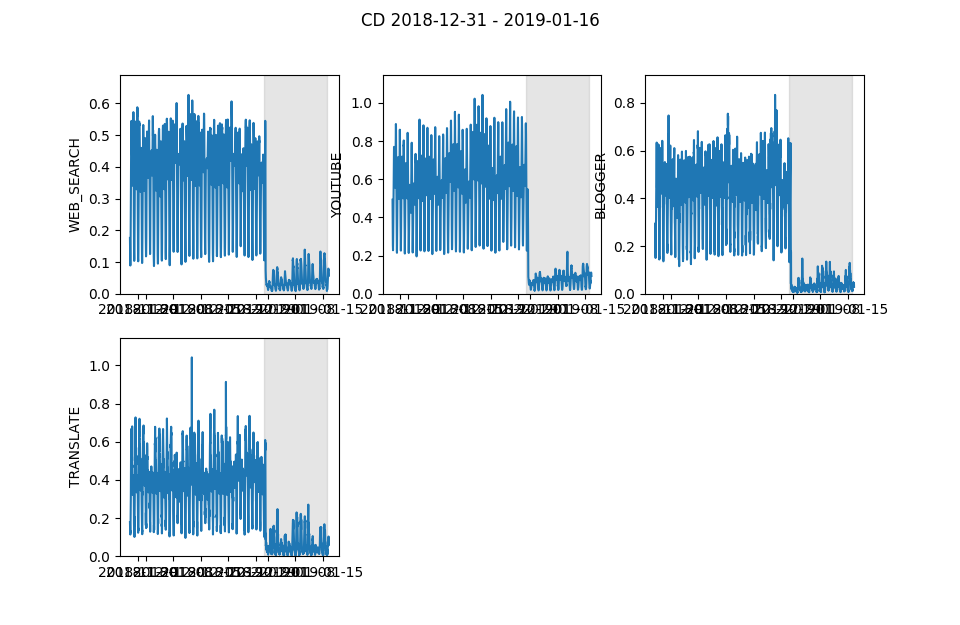

<IPython.core.display.Javascript object>


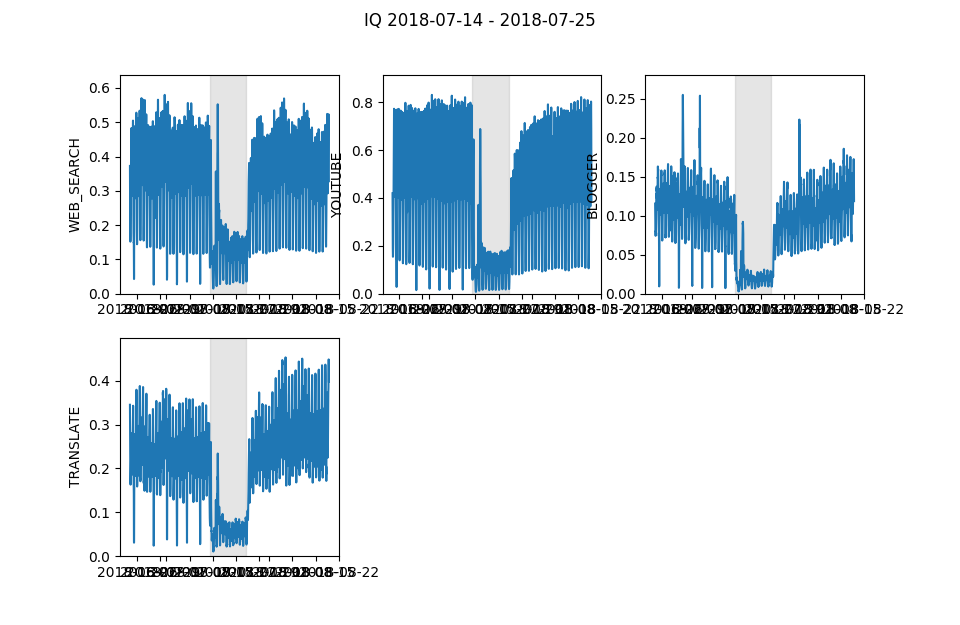

<IPython.core.display.Javascript object>


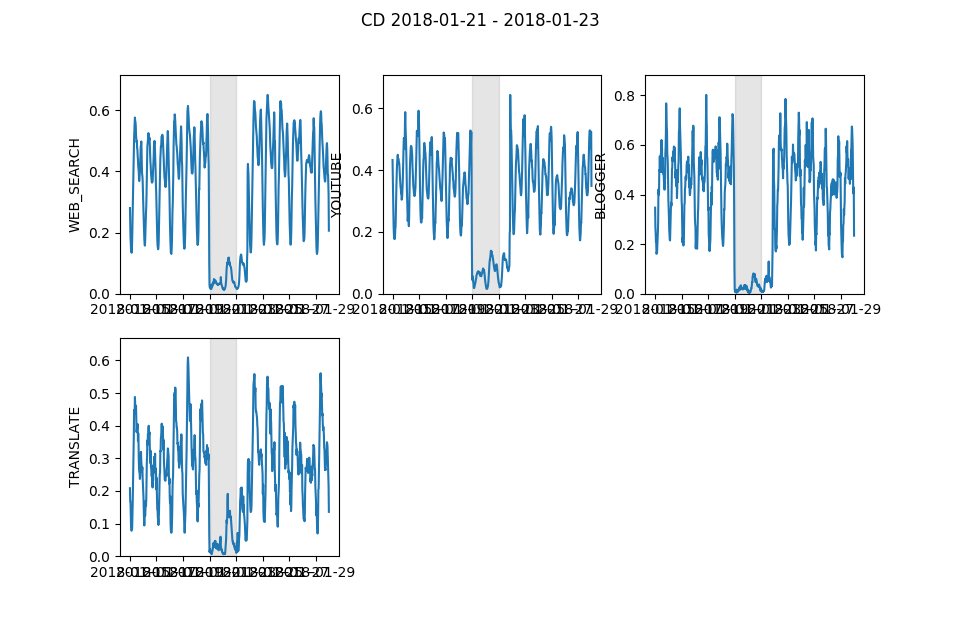

<IPython.core.display.Javascript object>


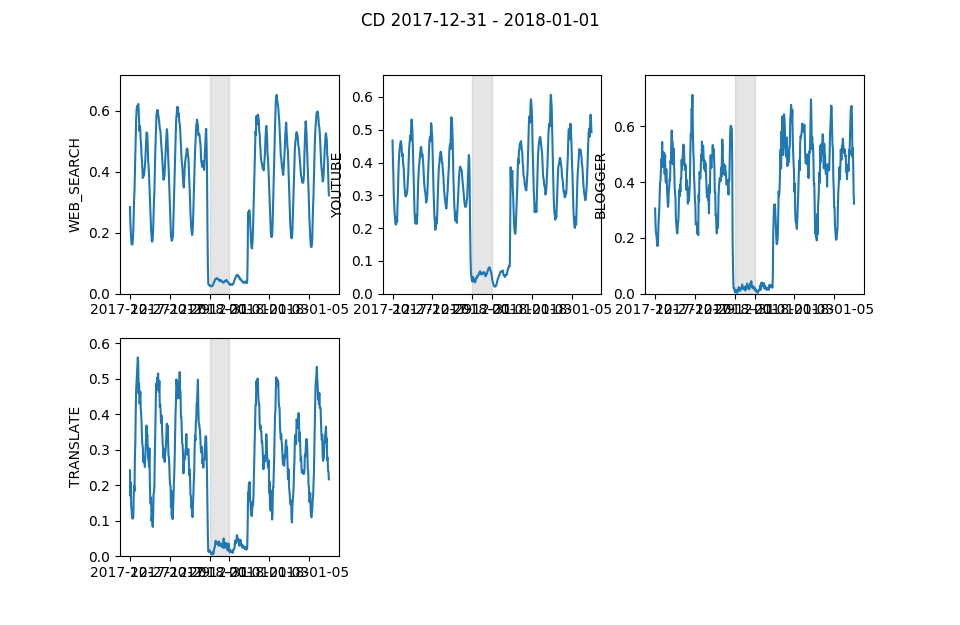

<IPython.core.display.Javascript object>


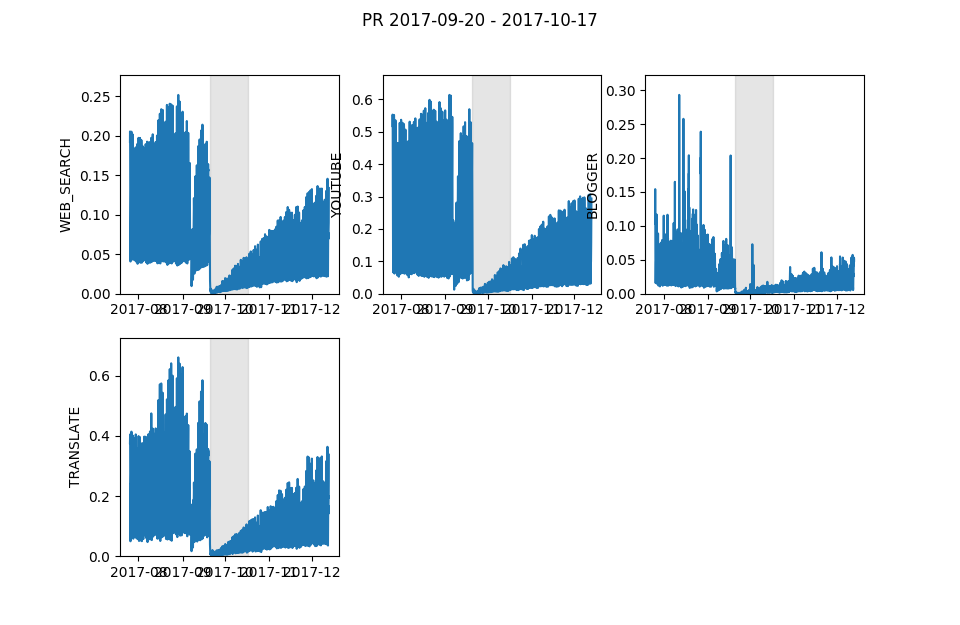

<IPython.core.display.Javascript object>


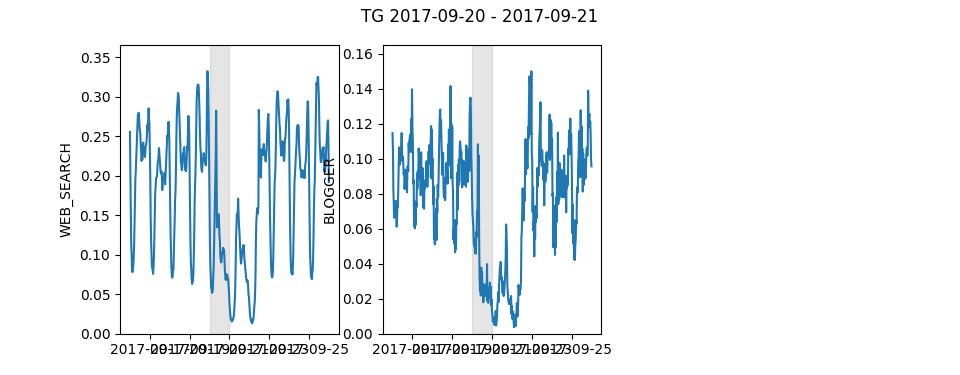

<IPython.core.display.Javascript object>


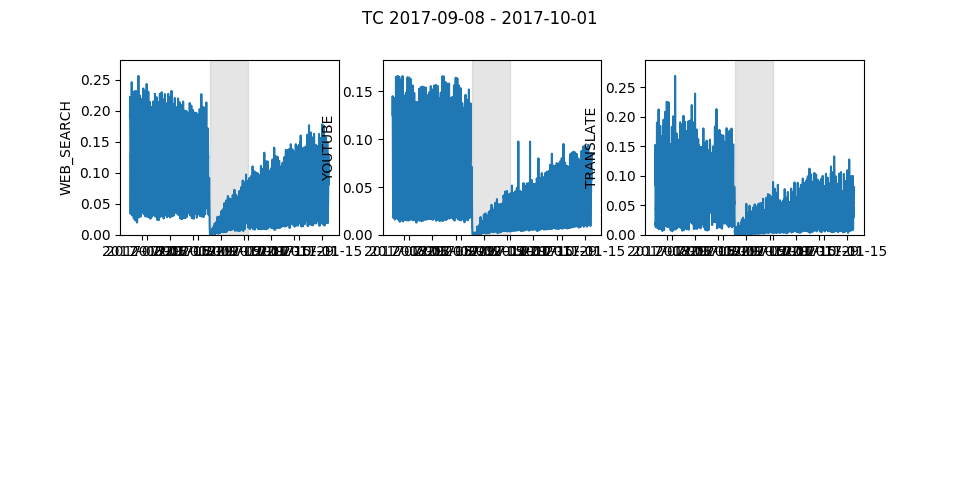

<IPython.core.display.Javascript object>


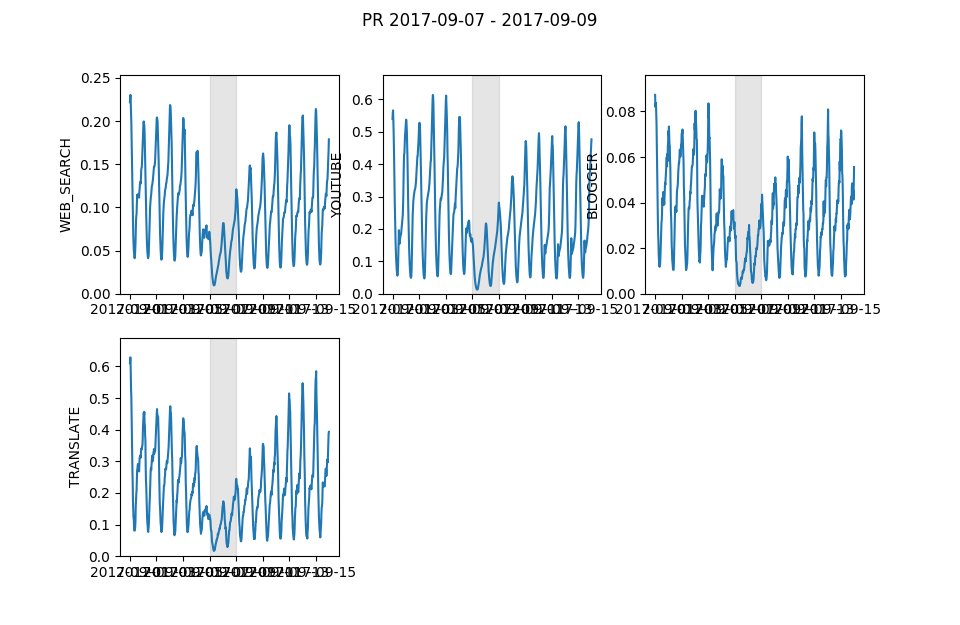

<IPython.core.display.Javascript object>


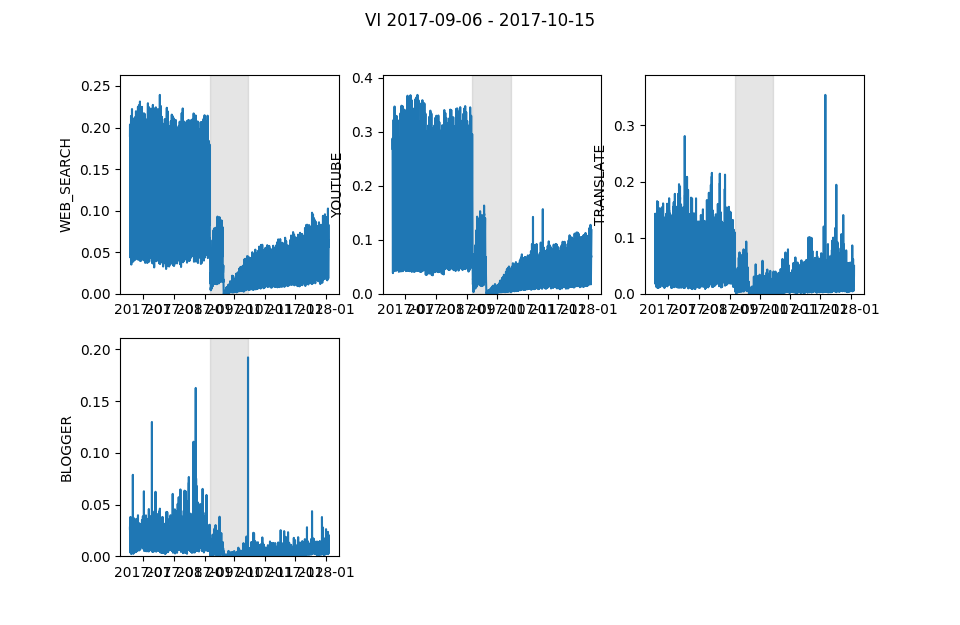

<IPython.core.display.Javascript object>


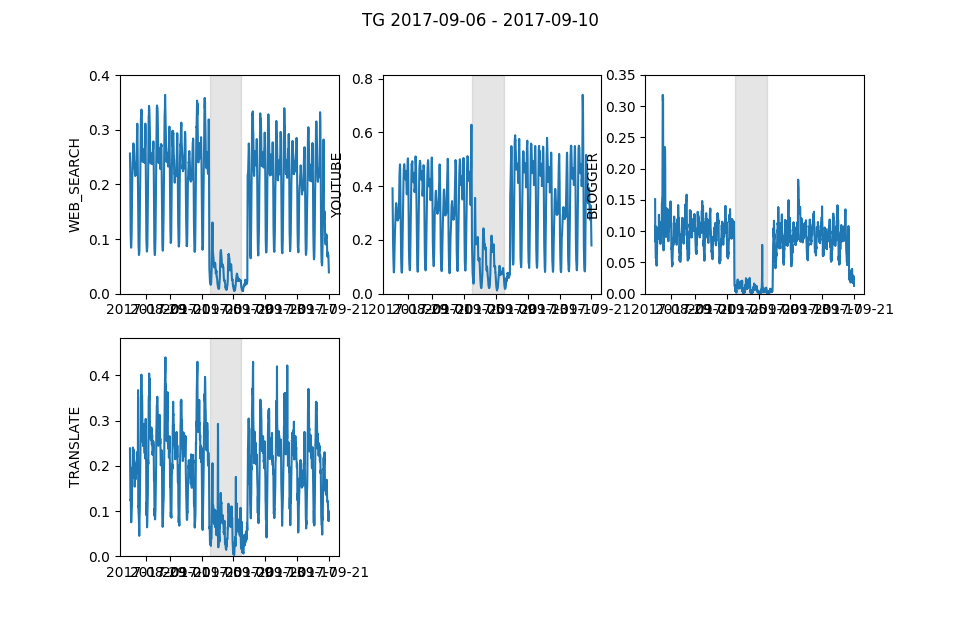

<IPython.core.display.Javascript object>


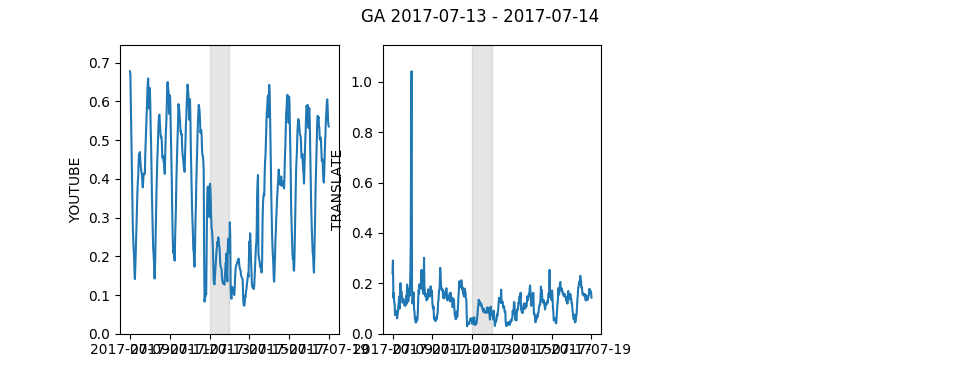

<IPython.core.display.Javascript object>


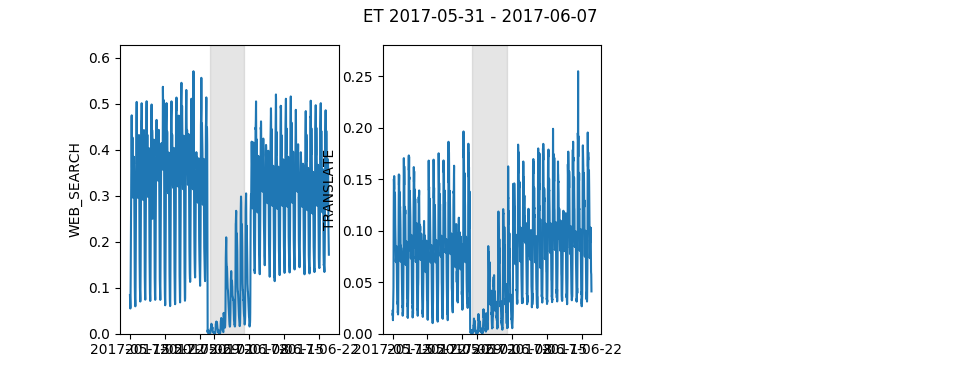

<IPython.core.display.Javascript object>


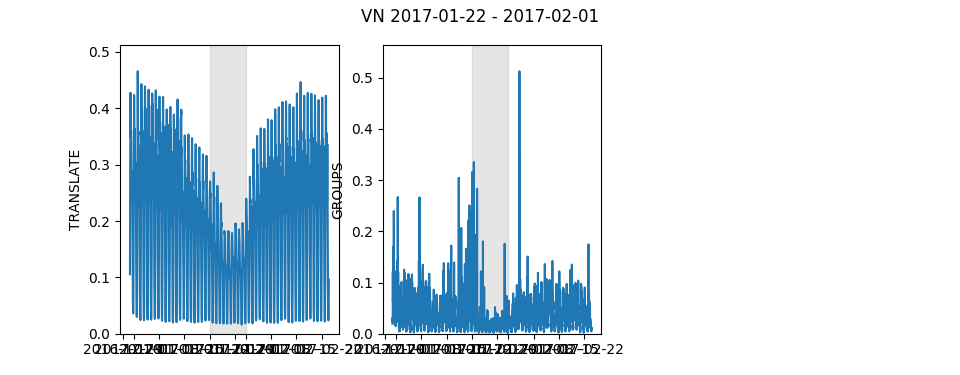

<IPython.core.display.Javascript object>


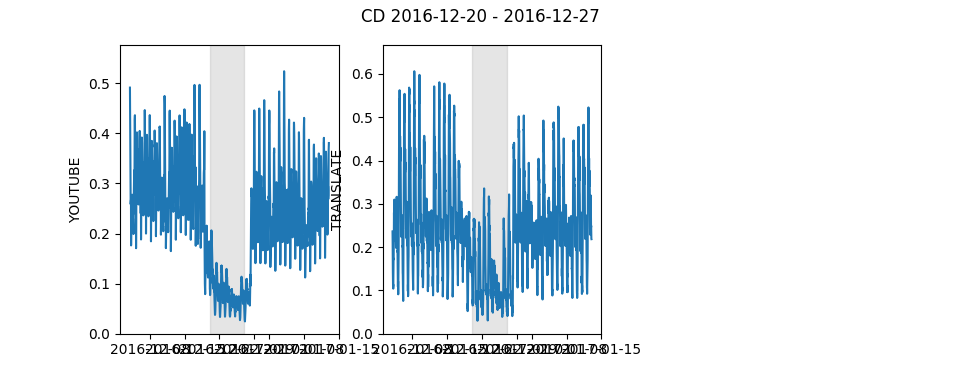

<IPython.core.display.Javascript object>


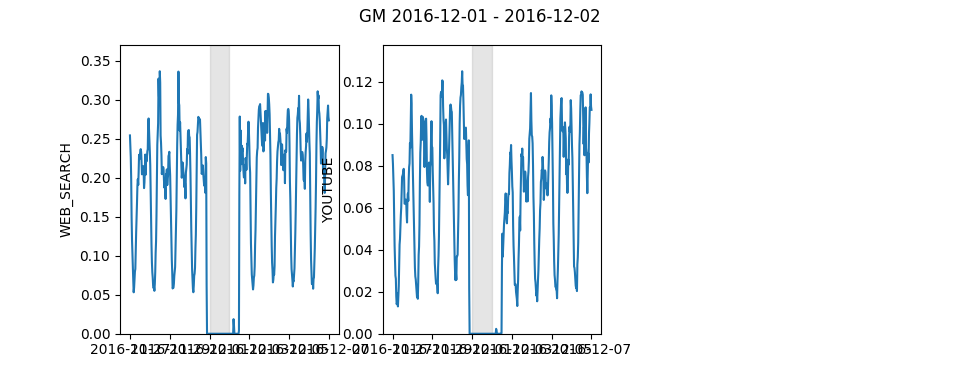

<IPython.core.display.Javascript object>


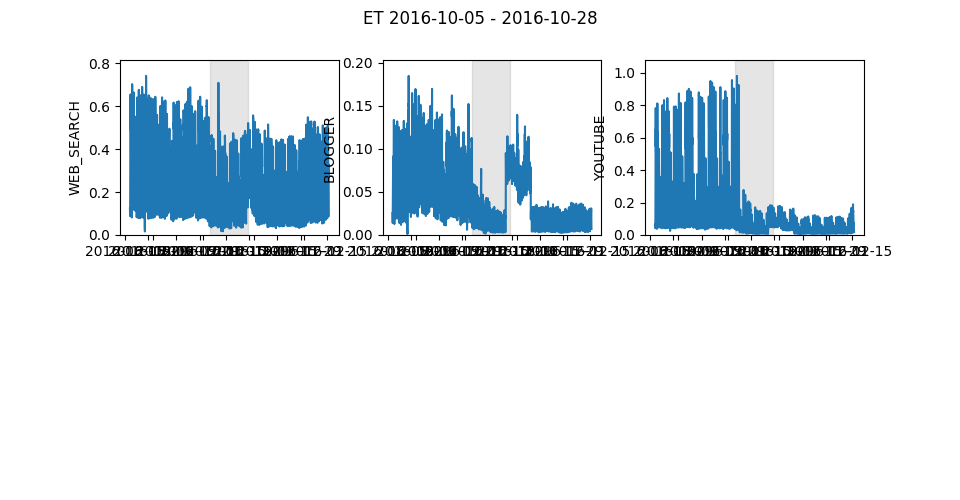

<IPython.core.display.Javascript object>


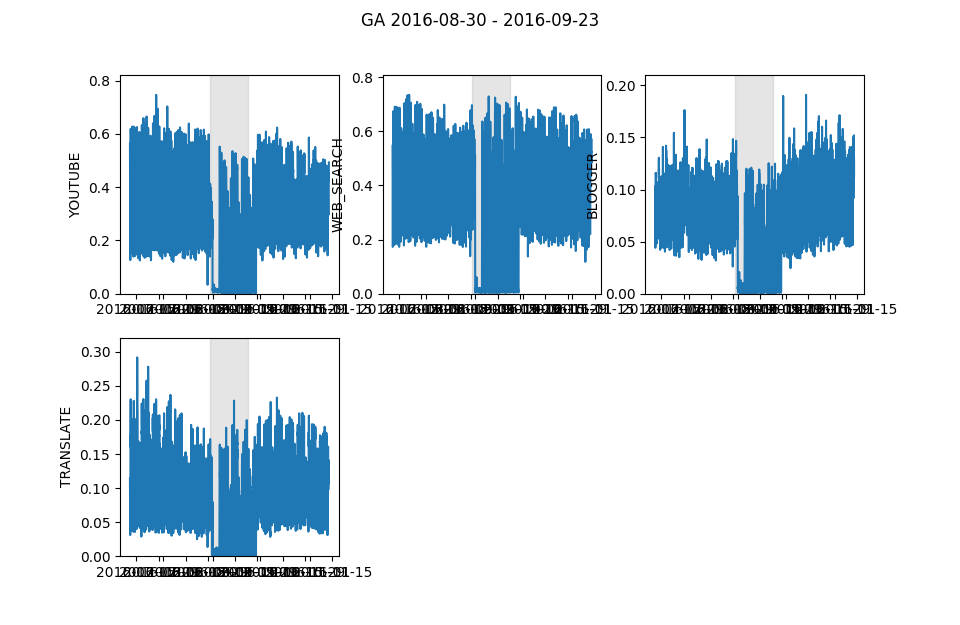

<IPython.core.display.Javascript object>


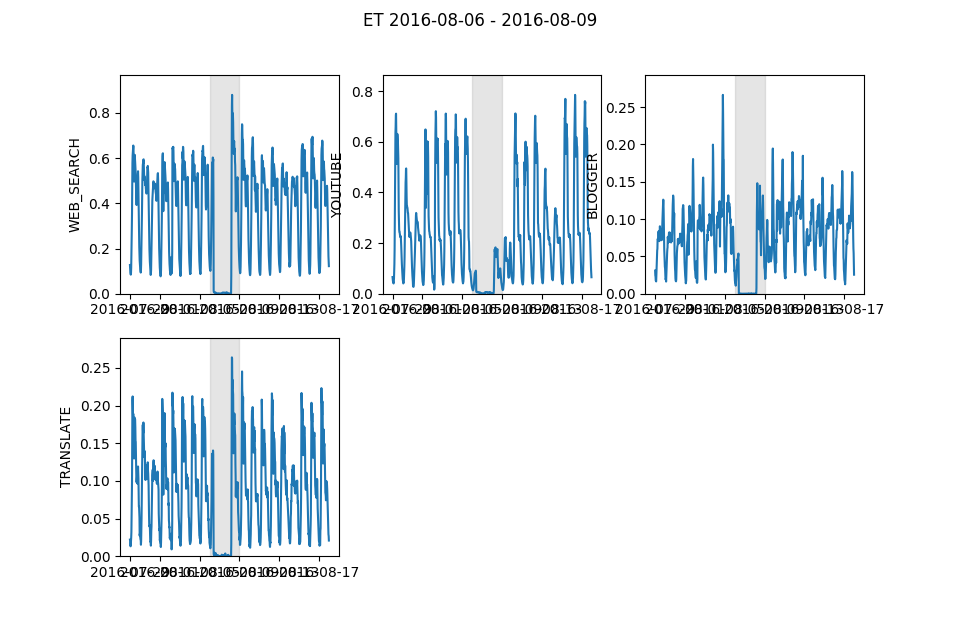

<IPython.core.display.Javascript object>


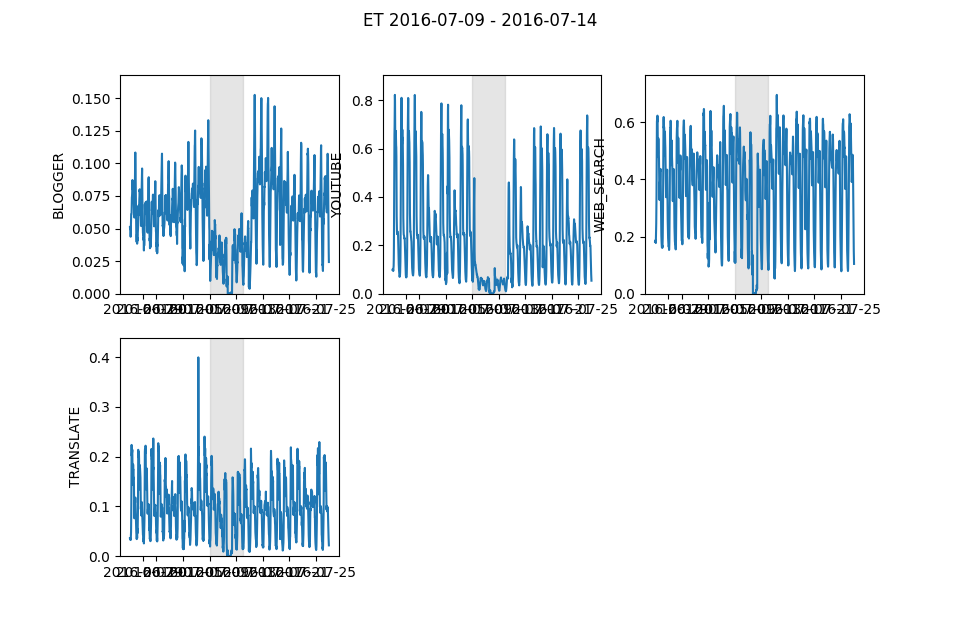

/usr/local/google/home/fortuna/firehook/net-analysis-github/.venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


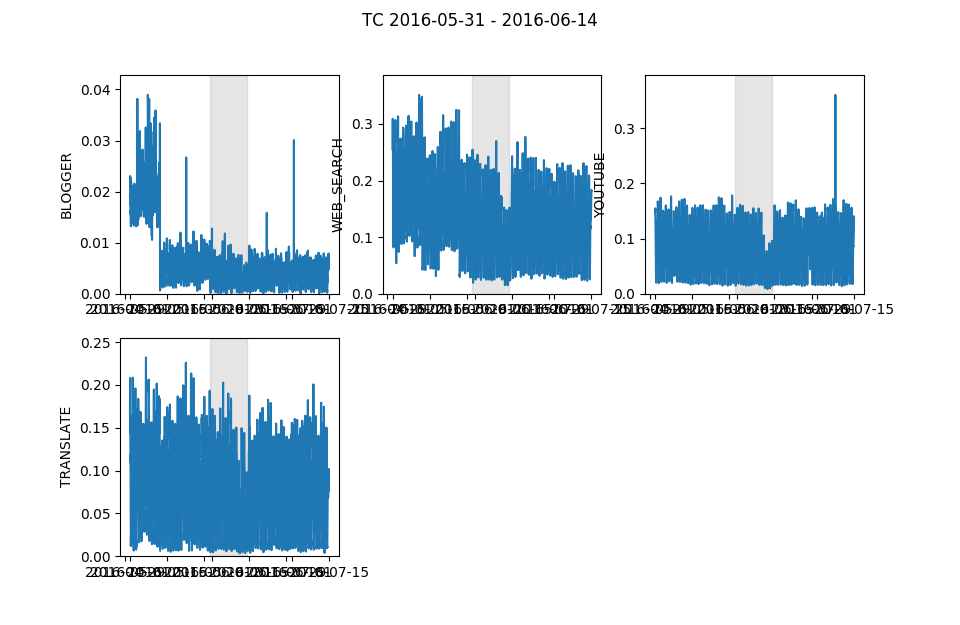

<IPython.core.display.Javascript object>


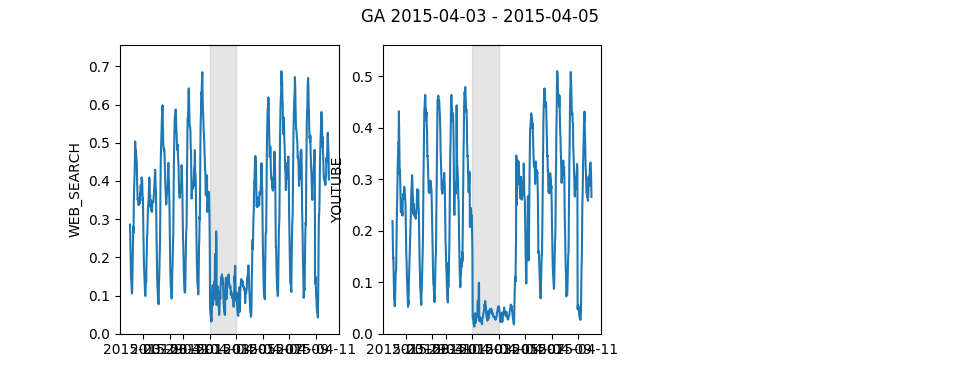

<IPython.core.display.Javascript object>


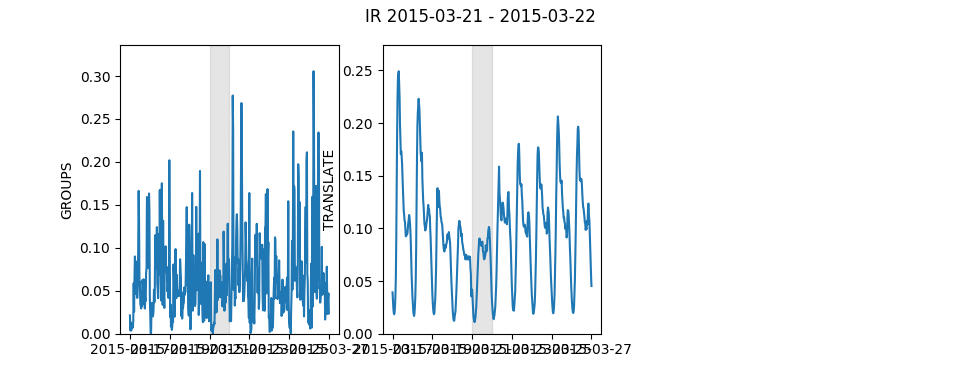

<IPython.core.display.Javascript object>


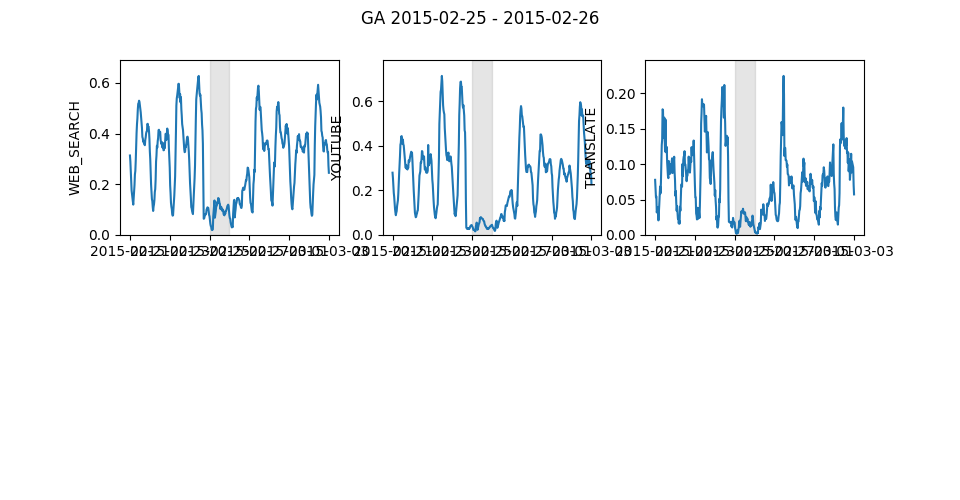

<IPython.core.display.Javascript object>


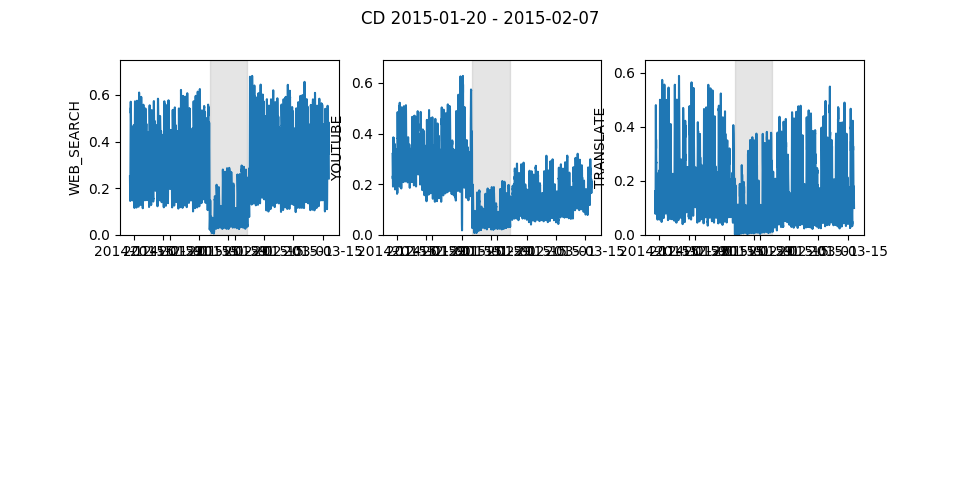

<IPython.core.display.Javascript object>


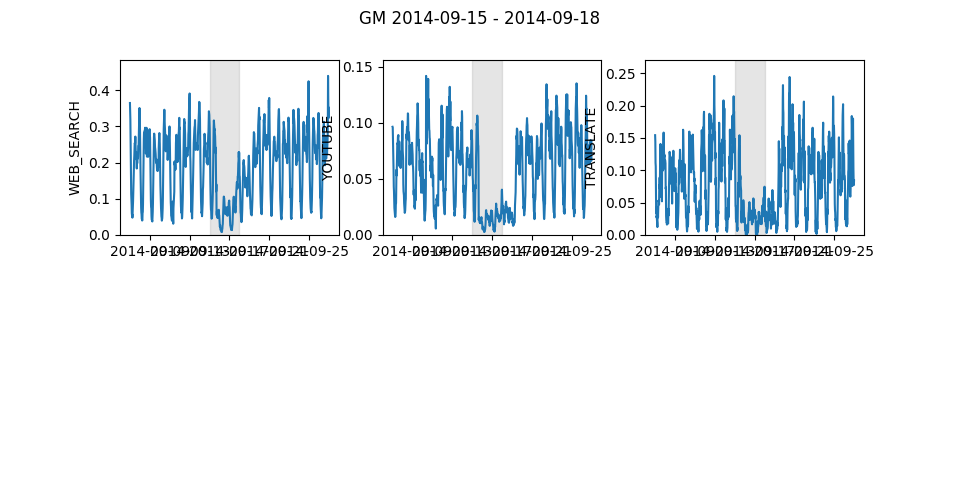

In [9]:
pyplot.close('all')
internet_shutdowns = [rd for rd in all_disruptions if len(rd.product_disruptions) >= 2]
print("Found %s shutdowns" % len(internet_shutdowns))

for region_disruption in internet_shutdowns:
    num_product_disruptions = len(region_disruption.product_disruptions)
    num_columns = 3
    num_rows = (num_product_disruptions + 1) / 2
    fig = pyplot.figure(figsize=(num_columns * 3.2, num_rows * 2.5))
    fig.tight_layout()
    fig.suptitle("%s %s - %s" % (region_disruption.region_code, region_disruption.start.date(), region_disruption.end.date()))
    end_date = region_disruption.end + datetime.timedelta(days=1)
    duration = end_date - region_disruption.start
    chart_padding = duration * 2
    chart_start_date = region_disruption.start - chart_padding
    chart_end_date = min(end_date + chart_padding, datetime.datetime.now())
    for index, product_disruption in enumerate(region_disruption.product_disruptions):
        chart_traffic = repo.get_traffic(
            region_disruption.region_code, product_disruption.product_id)[chart_start_date:chart_end_date]
        axes = fig.add_subplot(num_rows, num_columns, index + 1)
        axes.set_ylabel(product_disruption.product_id.name)
        axes.set_ylim(bottom=0, top=chart_traffic.max()*1.1)
        axes.plot(chart_traffic)
        axes.axvspan(region_disruption.start, region_disruption.end, alpha=0.2, color='grey')
    fig.show()

    #fa.print_disruption_csv(region_disruption)

## Findings

### We can find internet shutdowns by looking at cross-product disruptions

In the example below, we can see shutdowns in July, August and October 2016, and end of May 2017.

<IPython.core.display.Javascript object>


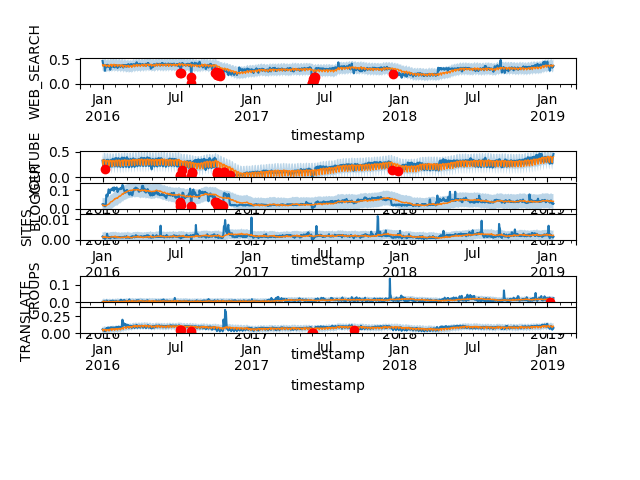

In [10]:
show_region_traffic("ET", PRODUCT_LIST)

### Anomalies in the US traffic can create anomalies in smaller countries

That happens because the traffic numbers are relative to global traffic, and US traffic dominates the global traffic for some products.

In the example below, the increase in US traffic in October 2016 caused a traffic drop in the other countries.

/usr/local/google/home/fortuna/firehook/net-analysis-github/.venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


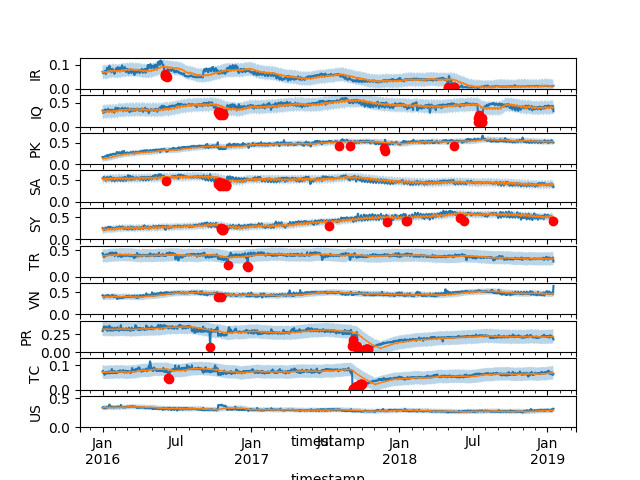

In [11]:
show_product_traffic(traffic.ProductId.YOUTUBE, [
    "IR", "IQ", "PK", "SA", "SY", "TR", "VN", "PR", "TC", "US"
])